In [1]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
#sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

#import forces as fc
import molecules as mc
import img3dto2d as i32
import util
#import random
#import copy
#from tqdm import tqdm

#mayavi imports:
from __future__ import absolute_import, division, print_function
from mayavi import mlab
import math

#stats:
import stats as st
from tqdm import tqdm

#video imports 
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\videoStuff")
import video_format as vf
from skimage.transform import resize, rescale
from skimage.morphology import label

********************************************************************************
         to build the TVTK classes (9.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
# load radius and all molecule positions
filename = "simV3R_1000_8000_1418_7_1000_abb9a.npy"#"simV3R_500_8000_1416_9_1000_8c033.npy"#"simV3R_1000_4000_214142_5_1000_dc035.npy"#"simV3R_500_4000_1414_5_1000_802c4.npy" #"simV3R_100_3000_1414_5_1000_8c01e.npy" #"simV3R_500_2000_1414_5_1000_d48e0.npy"#"simV3R_20_8000_1414_5_1000_ab233.npy"#"simV3R_500_3952_1416_5_1000_b3409.npy"
filename_split = filename.split("_")
#points, radii= old_load(filename)
points, radii, acc = mc.load_molecule_steps(filename)

#sim values:
num_frames = int(filename_split[1]) #can be stored at eg. 100 steps pr frame (to save space)
num_molecules = len(points[0])
size_const = int(filename_split[2])
seed = int(filename_split[3])
max_stepsize =  int(filename_split[4])
skip_frames = int(filename_split[5])
box_size = np.array([size_const,size_const,1000]) #may need to set the z value to differently

#image values
image_size = np.array([size_const,size_const])
sigma_scale = 1.5 #gauss values for individual circles
sigma_smooth = 100 #gauss smoothing

frames = [0,len(points) - 1] #select frames to plot
print("total frames", num_frames * skip_frames, "stored frames:" , num_frames, "molecules:",  num_molecules ," image size:", image_size , "seed:",seed, "max stepsize:",max_stepsize)

total frames 1000000 stored frames: 1000 molecules: 479  image size: [8000 8000] seed: 1418 max stepsize: 7


In [3]:
animate = False

In [4]:
#mayavi Animation

if animate:
  xs = np.array([inner_list[0] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
  ys = np.array([inner_list[1] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
  zs = np.array([inner_list[2] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
  mlab.clf()
  #mlab.points3d(0,0,0)

  # plt = mlab.points3d([0], [0], [0], resolution = 100, scale_factor = 100*2)
  # plt = mlab.points3d([300], [0], [0], resolution = 100, scale_factor = 200*2)
  #plt = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], resolution = 10, scale_factor = radius*2)
  plt2 = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], radii*2, resolution = 10, scale_mode = "scalar", scale_factor = 1)
  mlab.axes(extent = [0,box_size[0],0,box_size[1],0,box_size[2]])#ranges = [-100,500,-200,200,-200,200]
  text_position = (0,0,0)
  text_actor = mlab.text3d(500,150, 510, "TESTING", scale = 40, color = (0,0,0))
  @mlab.animate(delay = 100, ui = True, support_movie = True) #delay = 100
  def anim():
    f = mlab.gcf()
    while True:
      #temp = "step: "
      for step in range(len(xs)):#num_steps
        x = xs[step]#points[step][:, 0]
        y = ys[step]#points[step][:, 1]
        z = zs[step]#points[step][:, 2]
        plt2.mlab_source.set(x=x, y=y, z=z)
        # for i in range(num_molecules):
        # 		plt[i].mlab_source.set(x=x[i], y=y[i], z=z[i])
        text_actor.text = f"Frame: {step}"
        
        yield


  anim()
  mlab.show()

In [3]:
xs = np.array([inner_list[0] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
ys = np.array([inner_list[1] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
zs = np.array([inner_list[2] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))

(45.0, 54.735610317245346, 21464.99069877683, array([4023.11970139, 3980.46395111,  507.78584671]))


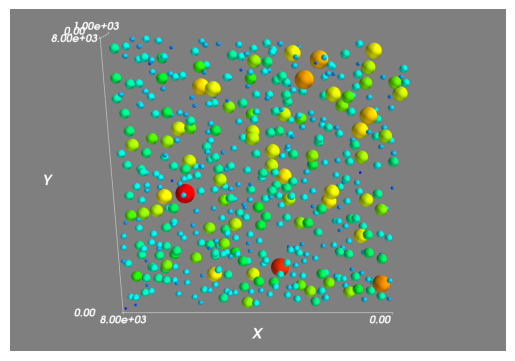

In [7]:
#mayavi individual frames
capture_frame = 2#num_frames-1#0

#mlab.clf()

plt2 = mlab.figure(size=(1424, 1024))

plt2 = mlab.points3d(points[capture_frame][:, 0], points[capture_frame][:, 1], points[capture_frame][:, 2], radii*2, resolution = 50, scale_mode = "scalar", scale_factor = 1)
#mlab.points3d(points[capture_frame][:, 0], points[capture_frame][:, 1], points[capture_frame][:, 2], radii*2, resolution = 50, scale_mode = "scalar", scale_factor = 1)
plt2 = mlab.axes(extent = [0,box_size[0],0,box_size[1],0,box_size[2]])

#set perspective
print(mlab.view())
mlab.view(azimuth=90,elevation=160,distance=18000.)



mlab.savefig('1111111111111.png',figure=plt2)
#mlab.show()
img = mlab.screenshot(figure=plt2)
#plt.figure(figsize=(8,8))
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.show()


mlab.close()

In [10]:
int(num_frames/3)

333.3333333333333

In [18]:
#mayavi individual frames
imgs = []
capture_frames = [0,int(num_frames/3),int(num_frames/3)*2,num_frames-1]#num_frames-1#0

#mlab.clf()
for cf in capture_frames:
  plt2 = mlab.figure(size=(1424, 1024))

  plt2 = mlab.points3d(points[cf][:, 0], points[cf][:, 1], points[cf][:, 2], radii*2, resolution = 50, scale_mode = "scalar", scale_factor = 1)
  #mlab.points3d(points[capture_frame][:, 0], points[capture_frame][:, 1], points[capture_frame][:, 2], radii*2, resolution = 50, scale_mode = "scalar", scale_factor = 1)
  plt2 = mlab.axes(extent = [0,box_size[0],0,box_size[1],0,box_size[2]])

  #set perspective
  print(mlab.view())
  mlab.view(azimuth=90,elevation=25,distance=18000.)



  mlab.savefig('1111111111111.png',figure=plt2)
  #mlab.show()
  img = mlab.screenshot(figure=plt2)
  imgs.append(img)
  #plt.figure(figsize=(8,8))
  #plt.imshow(img,cmap="gray")
  #plt.axis("off")
  #plt.show()


  mlab.close()

(45.0, 54.735610317245346, 21443.607512170463, array([4018.11589813, 3980.07562828,  508.5822258 ]))
(45.0, 54.735610317245346, 21705.20857505163, array([3972.08645511, 3937.05009937,  415.0007782 ]))
(45.0, 54.735610317245346, 21682.85153270161, array([3954.39357257, 3928.88608217,  406.64349747]))
(45.0, 54.735610317245346, 21703.814050402267, array([3930.68621826, 3979.44883919,  407.97138977]))


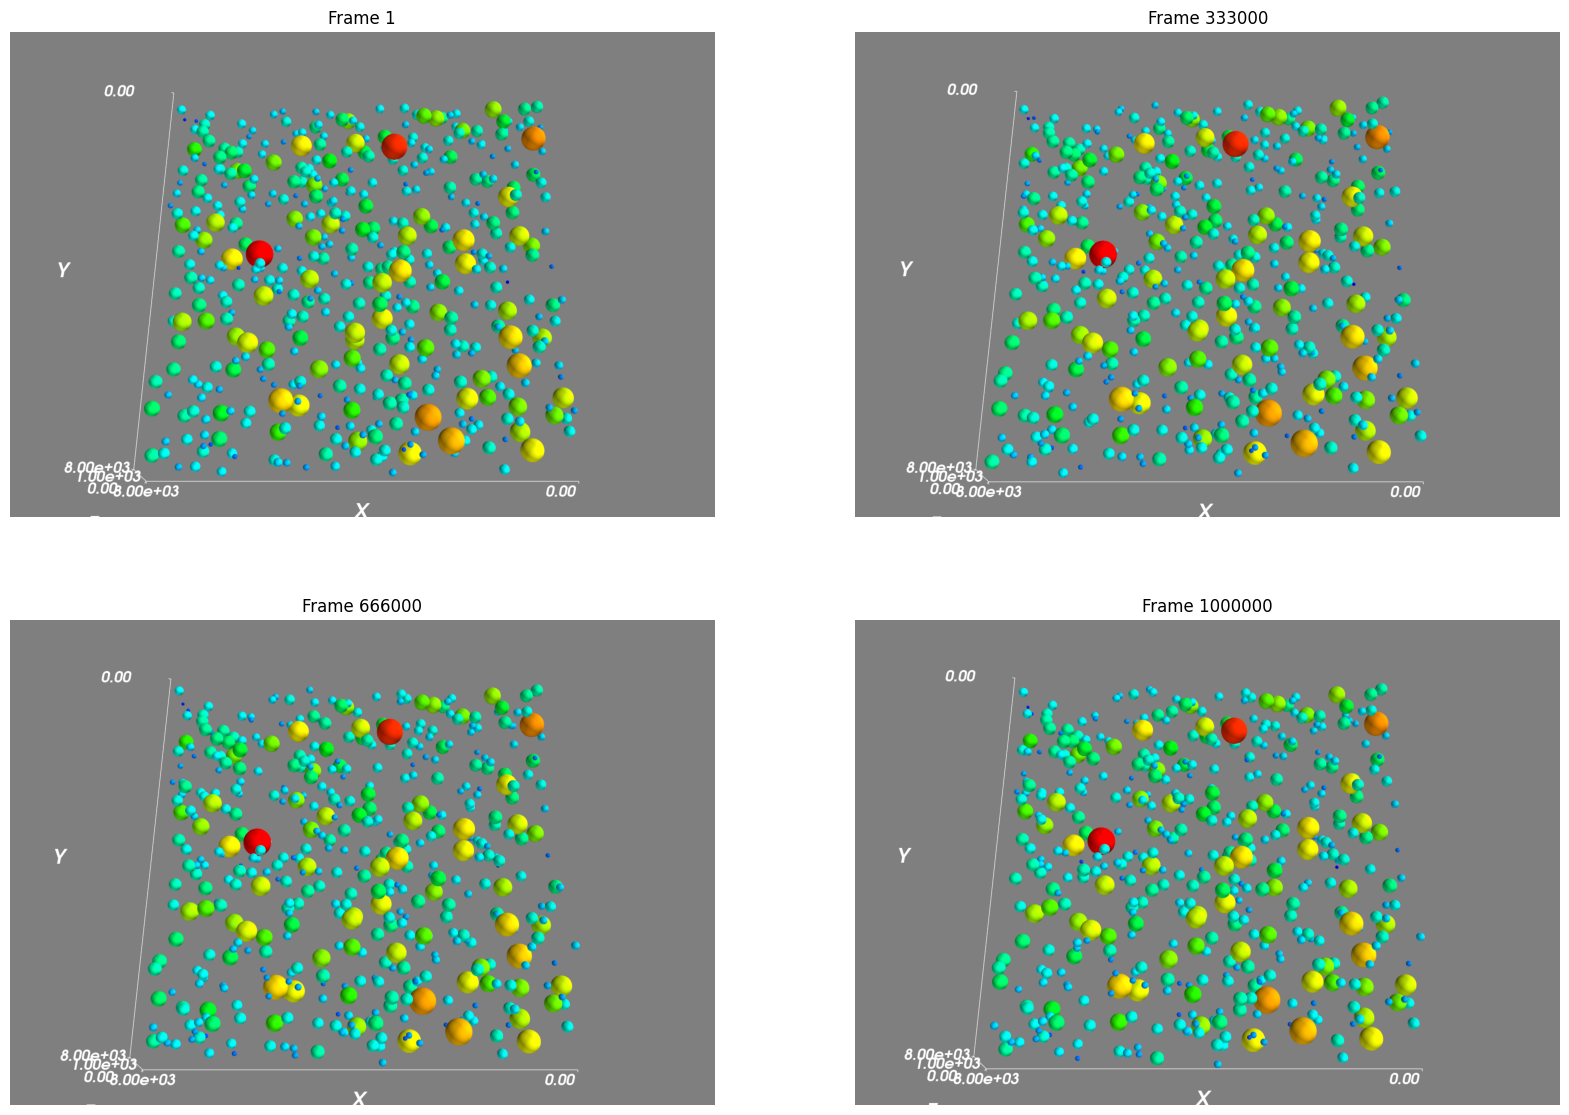

In [19]:
num_rows = 2
num_cols = int(len(capture_frames)/num_rows)
frame_text = [1,333_000,666_000,num_frames*skip_frames]
#plt.figure(figsize=(15,20)) # 1 row
plt.figure(figsize=(20,14))
for i, img in enumerate(imgs):

  plt.subplot(num_rows,num_cols,i+1)
  plt.title(f"Frame {frame_text[i]}")
  plt.imshow(img)
  plt.axis("off")

plt.show()